<a href="https://colab.research.google.com/github/ZahraFarahzadii/ECG-Classification/blob/main/Arrhythmia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and unzip MIT-BIH Arrhythmia dataset
!wget https://storage.googleapis.com/mitdb-1.0.0.physionet.org/mit-bih-arrhythmia-database-1.0.0.zip
!unzip 'mit-bih-arrhythmia-database-1.0.0.zip'

--2021-02-07 09:57:58--  https://storage.googleapis.com/mitdb-1.0.0.physionet.org/mit-bih-arrhythmia-database-1.0.0.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77030320 (73M) [application/zip]
Saving to: ‘mit-bih-arrhythmia-database-1.0.0.zip’

mit-bih-arrhythmia- 100%[===================>]  73.46M   102MB/s    in 0.7s    

2021-02-07 09:57:59 (102 MB/s) - ‘mit-bih-arrhythmia-database-1.0.0.zip’ saved [77030320/77030320]

Archive:  mit-bih-arrhythmia-database-1.0.0.zip
  inflating: mit-bih-arrhythmia-database-1.0.0/100.atr  
  inflating: mit-bih-arrhythmia-database-1.0.0/100.dat  
  inflating: mit-bih-arrhythmia-database-1.0.0/100.hea  
  inflating: mit-bih-arrhythmia-database-1.0.0/100.xws  
  inflating: mit-bih-arrhythmia-database-1.0.0/101.atr  
  inflating: mit-bi

In [ ]:
# install sfdb Library
!pip install wfdb

     |████████████████████████████████| 122kB 10.4MB/s 


In [ ]:
# import main Libraries
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import wfdb
import random
from scipy import signal

In [ ]:
# Rename Dataset Folder
os.rename('mit-bih-arrhythmia-database-1.0.0','mitdb')

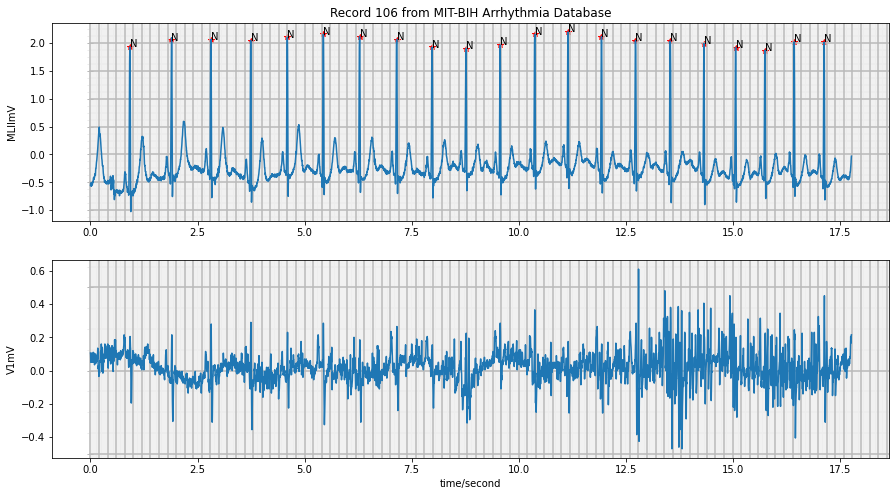

In [ ]:
# Demo an ECG signal  - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record_num=106
record = wfdb.rdrecord('mitdb/'+ str(record_num),sampfrom=3600, sampto=10000)
annotation = wfdb.rdann('mitdb/'+ str(record_num), 'atr',sampfrom=3600, sampto = 10000,shift_samps=True)

wfdb.plot_wfdb(record=record, annotation=annotation,plot_sym=True,
               title='Record '+str(record_num)+' from MIT-BIH Arrhythmia Database',
               time_units='seconds',
               figsize = (15,8),ecg_grids='all')

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '~', 'N', 'V', 'V', 'N', 'V', 'V', 'N', 'N', 'V', 'N', 'V', 'V', 'N', 'V', 'N', 'V', 'V', 'N', 'N', 'V', 'V', 'N', 'V', 'V', 'N', 'N']
    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ven

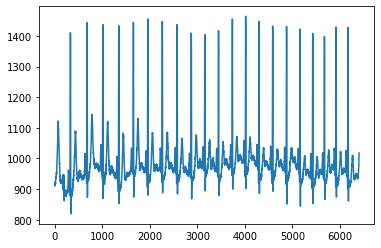

In [ ]:
# Displaying a demo Annotation symbols and all Annotation classes and ploting a demo ECG sample from channel 0
annotation = wfdb.rdann('mitdb/'+ str(record_num), 'atr',sampfrom=30000, sampto = 40000,shift_samps=True)
mytest=record.adc()
myann=annotation.symbol
print(myann)
plt.plot(mytest[:,0])
wfdb.io.show_ann_labels()

In [ ]:
# Segmentation ECGs to 10 seconds segments
# For Normal ECG for Record 100,105,215
# Number of samples from each Record = 540
seg_len=3600        # length of each segment
records_list=[100,105,215]
NOR_rec=[]
NOR_ann=[]
Len1=[]; Len2=[];
for rec in records_list:
  record=[]; annotation=[]
  record = wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=0, sampto=None)
  annotation = wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=0, sampto=None,shift_samps=True)
  L1=len(record.adc())         #Number of samples in record
  L2=len(annotation.symbol)   # Number of annotations in annotation
  Len1.append(L1)
  Len2.append(L2)
  samp = list(range(L1))
  random.shuffle(samp)
  cnt=0; idx=0
  while cnt<540:
    tmp1=[]; tmp2=[];
    start=samp[idx]
    stop=start+seg_len
    idx=idx+1
    if (start+seg_len)<L1:
      tmp1=wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=start, sampto=stop)
      tmp2=wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=start, sampto=stop,shift_samps=True)
      # if tmp2.symbol.count('N') == len(tmp2.symbol):
      if (tmp2.symbol.count('L') == 0) and (tmp2.symbol.count('R') == 0) and (tmp2.symbol.count('V') == 0) and (tmp2.symbol.count('A') == 0):
        NOR_rec.append(tmp1.adc())
        NOR_ann.append(tmp2.symbol)
        cnt=cnt+1



print(Len1)
print(Len2)
print(len(NOR_rec))
print(len(NOR_ann))


[650000, 650000, 650000]
[2274, 2691, 3400]
1620
1620


In [ ]:
# Segmentation ECGs to 10 seconds segments
# For LBB ECG for Record 109,111,214
# Number of samples from each Record = 540
seg_len=3600        # length of each segment
records_list=[109,111,214]
LBB_rec=[]
LBB_ann=[]
Len1=[]; Len2=[];
for rec in records_list:
  record=[]; annotation=[]
  record = wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=0, sampto=None)
  annotation = wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=0, sampto=None,shift_samps=True)
  L1=len(record.adc())         #Number of samples in record
  L2=len(annotation.symbol)   # Number of annotations in annotation
  Len1.append(L1)
  Len2.append(L2)
  samp = list(range(L1))
  random.shuffle(samp)
  cnt=0; idx=0
  while cnt<540:
    tmp1=[]; tmp2=[];
    start=samp[idx]
    stop=start+seg_len
    idx=idx+1
    if (start+seg_len)<L1:
      tmp1=wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=start, sampto=stop)
      tmp2=wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=start, sampto=stop,shift_samps=True)
      # if tmp2.symbol.count('N') == len(tmp2.symbol):
      if (tmp2.symbol.count('L') > 0) :
        LBB_rec.append(tmp1.adc())
        LBB_ann.append(tmp2.symbol)
        cnt=cnt+1



print(Len1)
print(Len2)
print(len(LBB_rec))
print(len(LBB_ann))


[650000, 650000, 650000]
[2535, 2133, 2297]
1620
1620


In [ ]:
# Segmentation ECGs to 10 seconds segments
# For RBB ECG for Record 118,124,212
# Number of samples from each Record = 540
seg_len=3600        # length of each segment
records_list=[118,124,212]
RBB_rec=[]
RBB_ann=[]
Len1=[]; Len2=[];
for rec in records_list:
  record=[]; annotation=[]
  record = wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=0, sampto=None)
  annotation = wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=0, sampto=None,shift_samps=True)
  L1=len(record.adc())         #Number of samples in record
  L2=len(annotation.symbol)   # Number of annotations in annotation
  Len1.append(L1)
  Len2.append(L2)
  samp = list(range(L1))
  random.shuffle(samp)
  cnt=0; idx=0
  while cnt<540:
    tmp1=[]; tmp2=[];
    start=samp[idx]
    stop=start+seg_len
    idx=idx+1
    if (start+seg_len)<L1:
      tmp1=wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=start, sampto=stop)
      tmp2=wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=start, sampto=stop,shift_samps=True)
      # if tmp2.symbol.count('N') == len(tmp2.symbol):
      if (tmp2.symbol.count('R') > 0) :
        RBB_rec.append(tmp1.adc())
        RBB_ann.append(tmp2.symbol)
        cnt=cnt+1



print(Len1)
print(Len2)
print(len(RBB_rec))
print(len(RBB_ann))


[650000, 650000, 650000]
[2301, 1634, 2763]
1620
1620


In [ ]:
# Segmentation ECGs to 10 seconds segments
# For PVC ECG for Record 106,223
# Number of samples from each Record = 360
seg_len=3600        # length of each segment
records_list=[106,223]
PVC_rec=[]
PVC_ann=[]
Len1=[]; Len2=[];
for rec in records_list:
  record=[]; annotation=[]
  record = wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=0, sampto=None)
  annotation = wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=0, sampto=None,shift_samps=True)
  L1=len(record.adc())         #Number of samples in record
  L2=len(annotation.symbol)   # Number of annotations in annotation
  Len1.append(L1)
  Len2.append(L2)
  samp = list(range(L1))
  random.shuffle(samp)
  cnt=0; idx=0
  while cnt<360:
    tmp1=[]; tmp2=[];
    start=samp[idx]
    stop=start+seg_len
    idx=idx+1
    if (start+seg_len)<L1:
      tmp1=wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=start, sampto=stop)
      tmp2=wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=start, sampto=stop,shift_samps=True)
      # if tmp2.symbol.count('N') == len(tmp2.symbol):
      if (tmp2.symbol.count('V') > 0) :
        PVC_rec.append(tmp1.adc())
        PVC_ann.append(tmp2.symbol)
        cnt=cnt+1



print(Len1)
print(Len2)
print(len(PVC_rec))
print(len(PVC_ann))


[650000, 650000]
[2098, 2643]
720
720


In [ ]:
# Segmentation ECGs to 10 seconds segments
# For APC ECG for Record 207,209,232
# Number of samples from each Record = 540
seg_len=3600        # length of each segment
records_list=[207,209,232]
APC_rec=[]
APC_ann=[]
Len1=[]; Len2=[];
for rec in records_list:
  record=[]; annotation=[]
  record = wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=0, sampto=None)
  annotation = wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=0, sampto=None,shift_samps=True)
  L1=len(record.adc())         #Number of samples in record
  L2=len(annotation.symbol)   # Number of annotations in annotation
  Len1.append(L1)
  Len2.append(L2)
  samp = list(range(L1))
  random.shuffle(samp)
  cnt=0; idx=0
  while cnt<540:
    tmp1=[]; tmp2=[];
    start=samp[idx]
    stop=start+seg_len
    idx=idx+1
    if (start+seg_len)<L1:
      tmp1=wfdb.rdrecord('mitdb/'+ str(rec),sampfrom=start, sampto=stop)
      tmp2=wfdb.rdann('mitdb/'+ str(rec), 'atr',sampfrom=start, sampto=stop,shift_samps=True)
      # if tmp2.symbol.count('N') == len(tmp2.symbol):
      if (tmp2.symbol.count('A') > 0) :
        APC_rec.append(tmp1.adc())
        APC_ann.append(tmp2.symbol)
        cnt=cnt+1



print(Len1)
print(Len2)
print(len(APC_rec))
print(len(APC_ann))


[650000, 650000, 650000]
[2385, 3052, 1816]
1620
1620


(3600,)
['A', 'A', 'A', 'A', 'R', 'A', 'A', 'A', 'A', 'A', 'A']


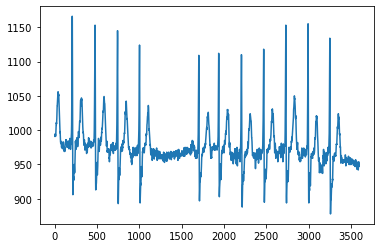

In [ ]:
# Plot a sample and its annotion
print(APC_rec[0][:,0].shape)
num=1200
plt.plot(APC_rec[num][:,0])
print(APC_ann[num])

(256, 256)


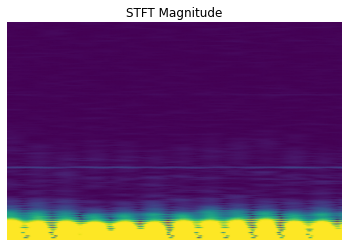

(256, 256)


In [ ]:
# Calculating the STFT of a sample and ploting its STFT Magnitue
x=NOR_rec[444][:,0]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=512,noverlap =500)
Zxx=Zxx[0:256,22:278]
print(Zxx.shape)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
plt.axis('off')
# plt.figure(figsize=(2.56,2.56),dpi=100)
# plt.savefig('test.jpg',bbox_inches='tight',pad_inches=0)
plt.show()
# plt.close()
print(Zxx.shape)

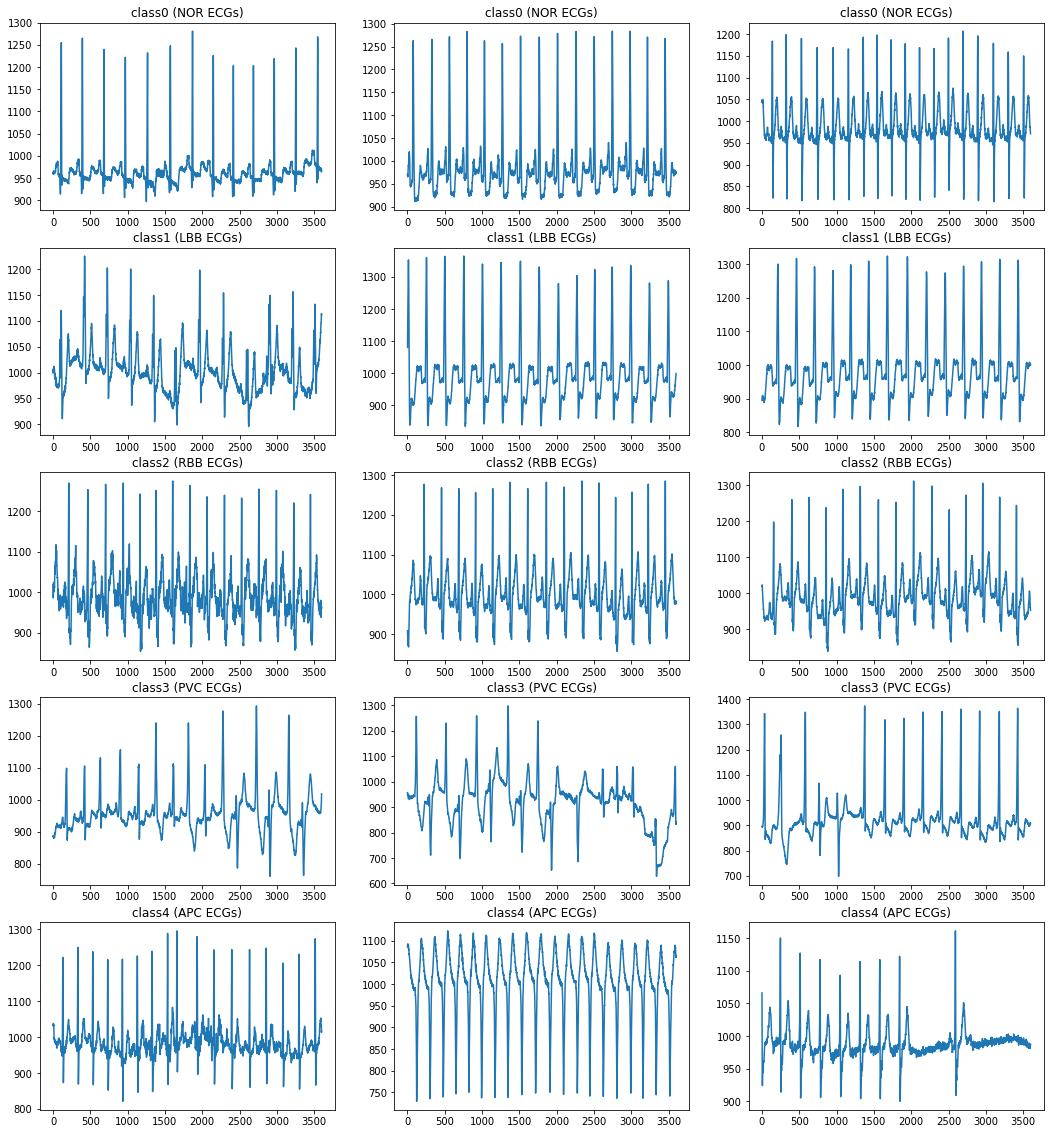

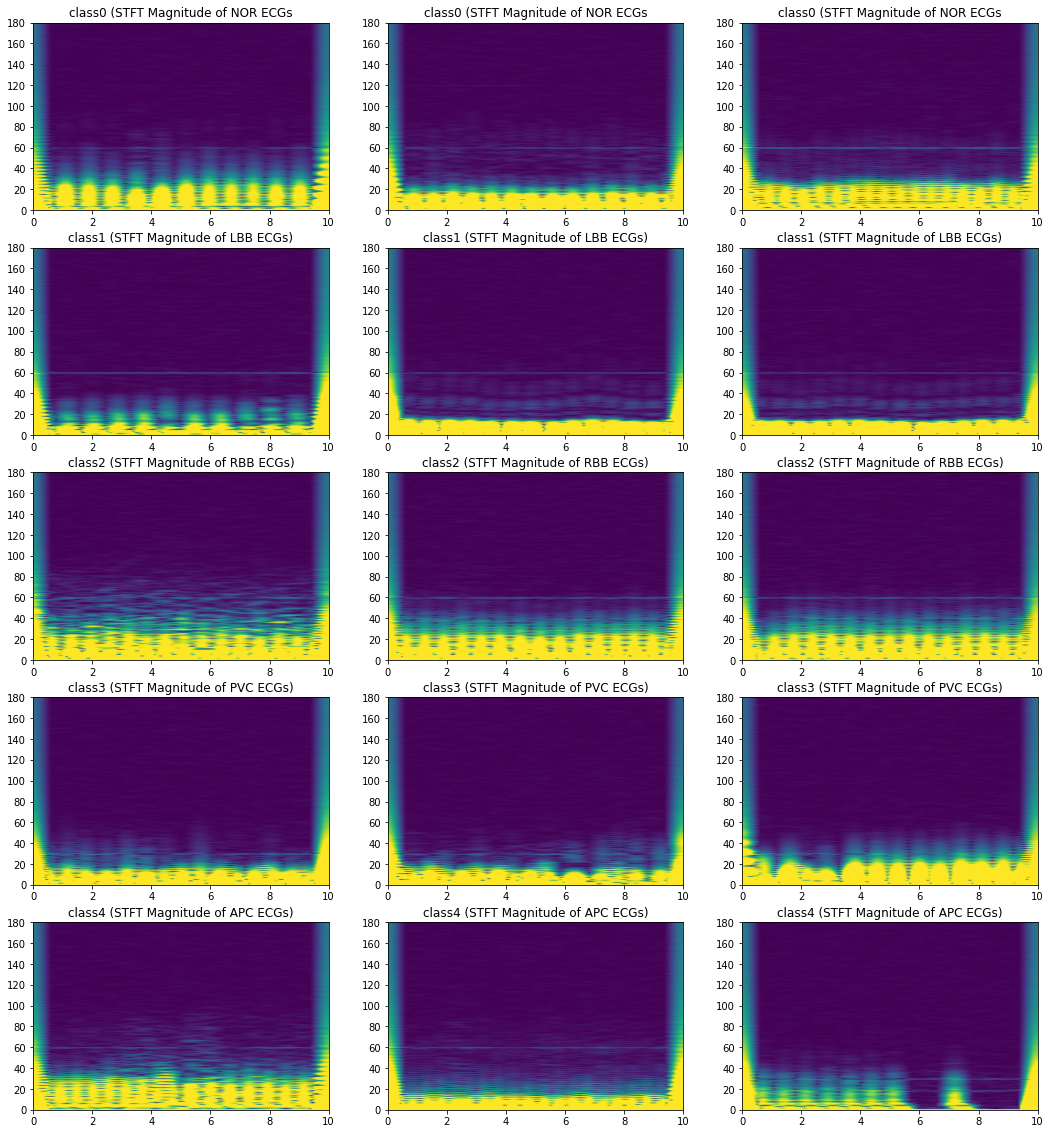

In [ ]:
# Display a 3 sample of each class and its STFT of that 5x3
x0=[]; x1=[];x2=[];x3=[]; x4=[]
for i in range(3): (x0.append(NOR_rec[i][:,0]))
for i in range(3): (x1.append(LBB_rec[i][:,0]))
for i in range(3): (x2.append(RBB_rec[i][:,0]))
for i in range(3): (x3.append(PVC_rec[i][:,0]))
for i in range(3): (x4.append(APC_rec[i][:,0]))

# Set up matplotlib fig, and size it to fit 5x3 pics
nrows=5;ncols=3
fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 4)

for count,i in enumerate(x0+x1+x2+x3+x4):
  plt.subplot(5,3,count+1)
  plt.plot(i)
  if count<3: plt.title('class0 (NOR ECGs)')
  if count>=3 and count<6: plt.title('class1 (LBB ECGs)')
  if count>=6 and count<9: plt.title('class2 (RBB ECGs)')
  if count>=9 and count<12: plt.title('class3 (PVC ECGs)')
  if count>=12: plt.title('class4 (APC ECGs)')
plt.show()

# Set up matplotlib fig, and size it to fit 5x3 pics for STFT of ECGs
fs=360
fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 4)
Zxx=[];f=[];t=[]
for count,i in enumerate(x0+x1+x2+x3+x4):
  f, t, Zxx = signal.stft(i, fs,window='hann',nperseg=512,noverlap =500)
  # Zxx=Zxx[0:256,22:278]
  plt.subplot(5,3,count+1)
  plt.pcolormesh(t,f,np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
  if count<3: plt.title('class0 (STFT Magnitude of NOR ECGs')
  if count>=3 and count<6: plt.title('class1 (STFT Magnitude of LBB ECGs)')
  if count>=6 and count<9: plt.title('class2 (STFT Magnitude of RBB ECGs)')
  if count>=9 and count<12: plt.title('class3 (STFT Magnitude of PVC ECGs)')
  if count>=12: plt.title('class4 (STFT Magnitude of APC ECGs)')
  Zxx=[];f=[];t=[]
plt.show()


# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.axis('off')

In [ ]:
# making folders for writing stft images in a train and valid folder
import cv2
import os
# import shutil
# shutil.rmtree('train')
# shutil.rmtree('valid')
os.mkdir('train')
os.mkdir('valid')
os.mkdir('train/class0')
os.mkdir('train/class1')
os.mkdir('train/class2')
os.mkdir('train/class3')
os.mkdir('train/class4')

os.mkdir('valid/class0')
os.mkdir('valid/class1')
os.mkdir('valid/class2')
os.mkdir('valid/class3')
os.mkdir('valid/class4')


In [ ]:
#shuffling data samples
random.shuffle(NOR_rec)
random.shuffle(LBB_rec)
random.shuffle(RBB_rec)
random.shuffle(PVC_rec)
random.shuffle(APC_rec)

In [ ]:
# saving NOR STFT images
train_num=600
valid_num=100
all=train_num+valid_num
fs=360
Zxx=[];x=[];cnt1=0;cnt2=0;
# NOR ECGs STFT
for i in range(all):
  x=NOR_rec[i][:,0]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=512,noverlap =500)
  Zxx=Zxx[0:256,22:278]
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
  plt.axis('off')
  if i<train_num:
    plt.savefig("train/class0/"+str(cnt1)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt1=cnt1+1
  if i>=train_num:
    plt.savefig("valid/class0/"+str(cnt2)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt2=cnt2+1
  plt.close()
  Zxx=[]; x=[]




In [ ]:
# saving LBB  STFT images
train_num=600
valid_num=100
all=train_num+valid_num
fs=360
Zxx=[];x=[];cnt1=0;cnt2=0;
# LBB ECGs STFT
for i in range(all):
  x=LBB_rec[i][:,0]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=512,noverlap =500)
  Zxx=Zxx[0:256,22:278]
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
  plt.axis('off')
  if i<train_num:
    plt.savefig("train/class1/"+str(cnt1)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt1=cnt1+1
  if i>=train_num:
    plt.savefig("valid/class1/"+str(cnt2)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt2=cnt2+1
  plt.close()
  Zxx=[]; x=[]


In [ ]:
# saving RBB  STFT images
train_num=600
valid_num=100
all=train_num+valid_num
fs=360
Zxx=[];x=[];cnt1=0;cnt2=0;
# RBB ECGs STFT
for i in range(all):
  x=RBB_rec[i][:,0]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=512,noverlap =500)
  Zxx=Zxx[0:256,22:278]
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
  plt.axis('off')
  if i<train_num:
    plt.savefig("train/class2/"+str(cnt1)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt1=cnt1+1
  if i>=train_num:
    plt.savefig("valid/class2/"+str(cnt2)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt2=cnt2+1
  plt.close()
  Zxx=[]; x=[]


In [ ]:
# saving PVC  STFT images
train_num=600
valid_num=100
all=train_num+valid_num
fs=360
Zxx=[];x=[];cnt1=0;cnt2=0;
# PVC ECGs STFT
for i in range(all):
  x=PVC_rec[i][:,0]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=512,noverlap =500)
  Zxx=Zxx[0:256,22:278]
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
  plt.axis('off')
  if i<train_num:
    plt.savefig("train/class3/"+str(cnt1)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt1=cnt1+1
  if i>=train_num:
    plt.savefig("valid/class3/"+str(cnt2)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt2=cnt2+1
  plt.close()
  Zxx=[]; x=[]


In [ ]:
# saving APC  STFT images
train_num=600
valid_num=100
all=train_num+valid_num
fs=360
Zxx=[];x=[];cnt1=0;cnt2=0;
# APC ECGs STFT
for i in range(all):
  x=APC_rec[i][:,0]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=512,noverlap =500)
  Zxx=Zxx[0:256,22:278]
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=5, shading='gouraud')
  plt.axis('off')
  if i<train_num:
    plt.savefig("train/class4/"+str(cnt1)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt1=cnt1+1
  if i>=train_num:
    plt.savefig("valid/class4/"+str(cnt2)+".jpg",bbox_inches='tight',pad_inches=0)
    cnt2=cnt2+1
  plt.close()
  Zxx=[]; x=[]


In [ ]:
# Define class path for train and valid images
import os
train_class0_path='train/class0'
train_class1_path='train/class1'
train_class2_path='train/class2'
train_class3_path='train/class3'
train_class4_path='train/class4'

valid_class0_path='valid/class0'
valid_class1_path='valid/class1'
valid_class2_path='valid/class2'
valid_class3_path='valid/class3'
valid_class4_path='valid/class4'

train_class0_names = os.listdir(train_class0_path)
train_class1_names = os.listdir(train_class1_path)
train_class2_names = os.listdir(train_class2_path)
train_class3_names = os.listdir(train_class3_path)
train_class4_names = os.listdir(train_class4_path)

valid_class0_names = os.listdir(valid_class0_path)
valid_class1_names = os.listdir(valid_class1_path)
valid_class2_names = os.listdir(valid_class2_path)
valid_class3_names = os.listdir(valid_class3_path)
valid_class4_names = os.listdir(valid_class4_path)

# Display the number of images of each class
print('total training class0 images:', len(os.listdir(train_class0_path)))
print('total training class1 images:', len(os.listdir(train_class1_path)))
print('total training class2 images:', len(os.listdir(train_class2_path)))
print('total training class3 images:', len(os.listdir(train_class3_path)))
print('total training class4 images:', len(os.listdir(train_class4_path)))

print('total validation class0 images:', len(os.listdir(valid_class0_path)))
print('total validation class1 images:', len(os.listdir(valid_class1_path)))
print('total validation class2 images:', len(os.listdir(valid_class2_path)))
print('total validation class3 images:', len(os.listdir(valid_class3_path)))
print('total validation class4 images:', len(os.listdir(valid_class4_path)))


total training class0 images: 600
total training class1 images: 600
total training class2 images: 600
total training class3 images: 600
total training class4 images: 600
total validation class0 images: 100
total validation class1 images: 100
total validation class2 images: 100
total validation class3 images: 100
total validation class4 images: 100


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 3

# Index for iterating over images
pic_index = 0

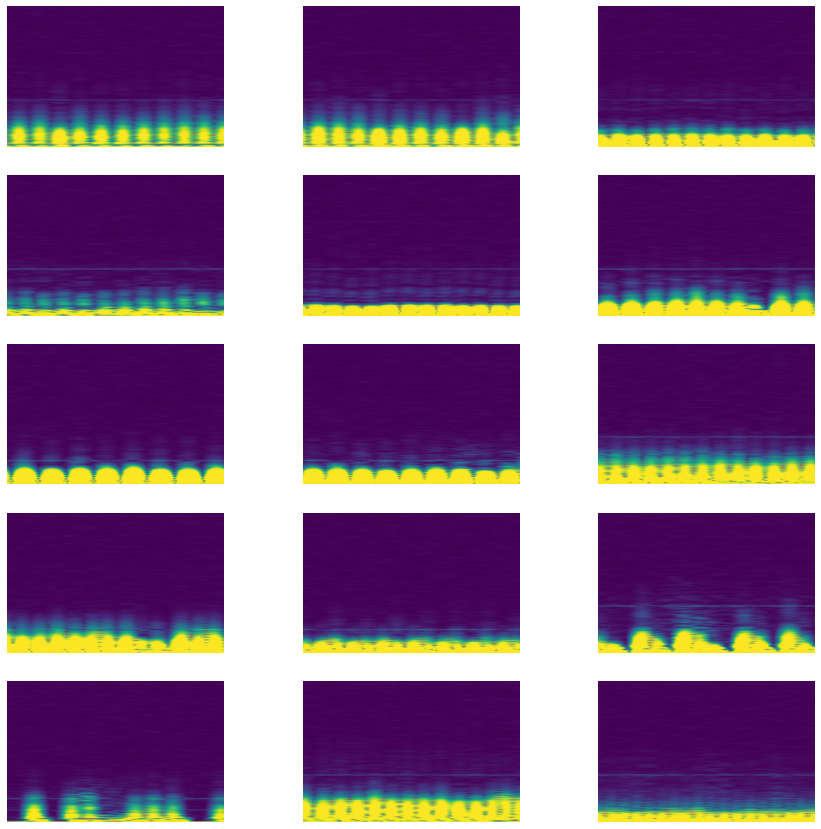

In [ ]:
# Displaying STFT images Prepared for Training
# Set up matplotlib fig, and size it to fit 5x3 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 3)

pic_index =+ 3
next_class0_pic = [os.path.join(train_class0_path, fname)
                for fname in train_class0_names[pic_index-3:pic_index]]
next_class1_pic = [os.path.join(train_class1_path, fname)
                for fname in train_class1_names[pic_index-3:pic_index]]
next_class2_pic = [os.path.join(train_class2_path, fname)
                for fname in train_class2_names[pic_index-3:pic_index]]
next_class3_pic = [os.path.join(train_class3_path, fname)
                for fname in train_class3_names[pic_index-3:pic_index]]
next_class4_pic = [os.path.join(train_class4_path, fname)
                for fname in train_class4_names[pic_index-3:pic_index]]

for i, img_path in enumerate(next_class0_pic + next_class1_pic + next_class2_pic + next_class3_pic +next_class4_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Training STFT Images Using Keras with tensorflow backend
# importing libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K

# model.load_weights('model_saved.h5')
img_width, img_height = 256, 256

train_data_dir = 'train'
validation_data_dir = 'valid'
nb_train_samples = 3000
nb_validation_samples = 500
epochs = 70
batch_size = 200

if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(8, (4, 4), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(13, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(13, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(5))
model.add(Activation('softmax'))

# Compile Model
opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='binary_crossentropy',
					optimizer =opt,
				metrics =['accuracy'])

# Data Genearatating from dataset for Training the model and Validating
train_datagen = ImageDataGenerator(
				rescale = 1. / 255,
				shear_range = 0.2,
				zoom_range = 0.2,
        horizontal_flip = True,
        )

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
							target_size =(img_width, img_height),
					batch_size = batch_size, class_mode='categorical',shuffle=True)

validation_generator = test_datagen.flow_from_directory(
									validation_data_dir,
				target_size =(img_width, img_height),
		batch_size = batch_size, class_mode ='categorical',shuffle=True)

# Fitting the model (Train)
myhistory=model.fit(train_generator,
	steps_per_epoch = nb_train_samples // batch_size,
	epochs = epochs, validation_data = validation_generator,
	validation_steps = nb_validation_samples // batch_size,shuffle=True)

# Save Trained Model
model.save_weights('model__weights_saved.h5')
model.save("my_model.h5")

Found 3000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/70
15/15 [==============================] - 42s 3s/step - loss: 0.5591 - accuracy: 0.2066 - val_loss: 0.4914 - val_accuracy: 0.2700
Epoch 2/70
15/15 [==============================] - 40s 3s/step - loss: 0.5028 - accuracy: 0.2488 - val_loss: 0.4767 - val_accuracy: 0.3725
Epoch 3/70
15/15 [==============================] - 40s 3s/step - loss: 0.4976 - accuracy: 0.2636 - val_loss: 0.4712 - val_accuracy: 0.5575
Epoch 4/70
15/15 [==============================] - 40s 3s/step - loss: 0.4839 - accuracy: 0.3126 - val_loss: 0.4652 - val_accuracy: 0.4500
Epoch 5/70
15/15 [==============================] - 39s 3s/step - loss: 0.4731 - accuracy: 0.3363 - val_loss: 0.4535 - val_accuracy: 0.4550
Epoch 6/70
15/15 [==============================] - 40s 3s/step - loss: 0.4615 - accuracy: 0.3733 - val_loss: 0.4426 - val_accuracy: 0.4525
Epoch 7/70
15/15 [==============================] - 39s 3s/step - loss: 0.448

In [ ]:
# Evalution model based on 500 STFT sample validation
model.evaluate(validation_generator)

3/3 [==============================] - 1s 325ms/step - loss: 0.0094 - accuracy: 0.9920


[0.00936224777251482, 0.9919999837875366]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

3/3 [==============================] - 1s 307ms/step


In [ ]:
# list all data in history
print(myhistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


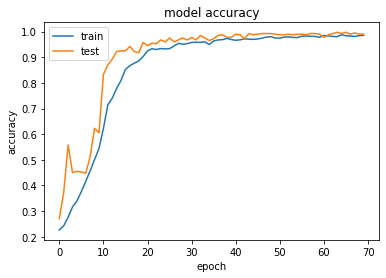

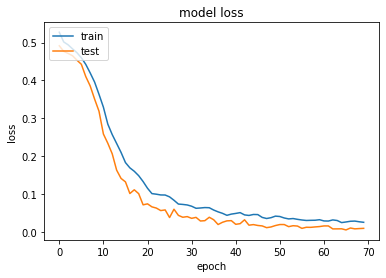

In [ ]:
# summarize history for accuracy
plt.plot(myhistory.history['accuracy'])
plt.plot(myhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

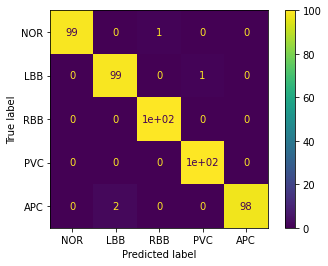

In [ ]:
# plot confusion matris based on Validation data
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

class_names = ['NOR','LBB','RBB','PVC','APC']
y_pred=[];y_true=[];
for cls in range(5):
  for i in range(100):
      path = 'valid/class'+ str(cls)+'/'+str(i)+'.jpg'
      img = image.load_img(path, target_size=(256, 256))
      x = image.img_to_array(img)
      x=x/255;
      x = np.expand_dims(x, axis=0)
      mypred = model.predict(x)
      y_pred.append(class_names[np.argmax(mypred)])
      y_true.append(class_names[cls])

cm = confusion_matrix(y_true, y_pred, labels=['NOR','LBB','RBB','PVC','APC'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NOR','LBB','RBB','PVC','APC'])
disp.plot()

In [ ]:
# make a prediction on a test image
from tensorflow.keras.preprocessing import image
class_names = ['NOR','LBB','RBB','PVC','APC']
path = 'valid/class4/35.jpg'
img = image.load_img(path, target_size=(256, 256))
x = image.img_to_array(img)
x=x/255;
x = np.expand_dims(x, axis=0)
mypred = model.predict(x)
print(class_names[np.argmax(mypred)])
print(mypred)

APC
[[5.4221274e-04 2.7150987e-05 2.1413478e-04 7.2265109e-08 9.9921644e-01]]


In [ ]:
# Model summary layers and parameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 253, 253, 8)       392       
_________________________________________________________________
activation_20 (Activation)   (None, 253, 253, 8)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 8)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 13)      429       
_________________________________________________________________
activation_21 (Activation)   (None, 125, 125, 13)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 13)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 13)       